## <font color='mediumblue'>Carga de librerías de trabajo y conjunto de datos</font>

Los siguientes fueron los paquetes y librerías que se utilizaron para llevar a cabo el presente análisis de datos. Los paquetes y librería se organizaron en bloques según la aplicación de cada una de estas. 

In [1]:
#Carga las librerías de trabajo básico en Python. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy

In [2]:
#Filtra las alertas de los bloques de código.
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
#Importa las librerías para normalizar el conjunto de datos.
from sklearn import preprocessing

In [4]:
#Importa las librerías para dividir los conjuntos de datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split

In [5]:
#Importa las librerías algoritmos para determinar los modelos predictores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [6]:
#Importa las librerías para determinar el rendimiento de los algoritmos predictores.
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import tree

In [7]:
#Importa las liberías para realizar ingeniería de atributos
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

El conjunto de datos fue extraído del Departamento de Energía de Estados Unidos, para ser más específico del link a continuación:
https://www.fueleconomy.gov/feg/download.shtml
<br>Estos datos corresponden a la eficiencia energética recolectada desde 1984 hasta 2020 de una amplia variedad de modelos y sus respectivos atributos que los caracterizan. El link a continuación describe los atributos que componen cada una de las observaciones del conjunto de datos. 
https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle
<br>Es importante establecer que el alcance de este análisis cubrirá única y exclusivamente motores de combustión interna que utilicen gasolina o diesel como combustible. Los vehículos que utilicen combustibles alternativos como CNG, LPG, etanol o inclusive sean eléctricos no serán contemplados en este análisis.
<br>En función de lo planteado anteriormente, el conjunto de datos fue procesado de manera previa para eliminar los atributos que tienen relación con los combustibles alternativos y que por tanto no tienen inherencia en el análisis.

In [8]:
#Carga el conjunto de datos procesado en el notebook de análisis.
VehiclesMPGRaw = pd.read_csv("Vehicles_MPG_Filtered.csv",header=0)
rawDatasetSize = VehiclesMPGRaw.shape
print("El siguiente es el tamaño del conjunto de datos crudo: " + str(rawDatasetSize))

El siguiente es el tamaño del conjunto de datos crudo: (39480, 22)


## <font color='mediumblue'>Preprocesamiento de conjunto de datos</font>

En primera instancia se inspeccionó la cantidad de observaciones faltantes en el conjunto de datos. Tal como se observa en las líneas de código a continuación, los atributos **Transmission_Description** y las asociadas al **volumen en pies cúbicos de la cabina de algunos modelos (HLV, HPV, LV2, LV4, PV2 y PV4** tienen una representativa cantidad de atributos faltantes que ronda el 50% de la cantidad total de observaciones del conjunto de datos. 
<br>Dada la magnitud de la cantidad de observaciones faltantes se decide eliminar dichos atributos ya que en su mayoría corresponden a variables categóricas a las cuales no se recomienda sustituir mediante algún tratamiento estadístico.
<br>En cuanto al atributo **Drivetrain** se decidió simplemente eliminar las observaciones faltantes dado que en orden de magnitud son pocas en relación con el tamaño total del conjunto de datos.

In [9]:
#Despliega las primeras observaciones del conjunto de datos.
VehiclesMPGRaw.head()

,Fuel_Type,Fuel_Quality,Make,Model,Year,Vehicle_Class,Transmission_Type,Number_Gears,Transmission_Description,Drivetrain,Engine_Type,Cylinder,Engine_Displacement,Start_Stop,CO2,HLV,HPV,LV2,LV4,PV2,PV4,Comb08
0,Gasoline,Regular,Alfa Romeo,Spider Veloce 2000,1985,Two Seaters,Manual,5,NaN,Rear-Wheel Drive,Naturally_Aspirated,4,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
1,Gasoline,Regular,Ferrari,Testarossa,1985,Two Seaters,Manual,5,NaN,Rear-Wheel Drive,Naturally_Aspirated,12,4.9,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
2,Gasoline,Regular,Dodge,Charger,1985,Subcompact Cars,Manual,5,SIL,Front-Wheel Drive,Naturally_Aspirated,4,2.2,N,NaN,19.0,77.0,0.0,0.0,0.0,0.0,27
3,Gasoline,Regular,Dodge,B150/B250 Wagon 2WD,1985,Vans,Automatic_Select_Shift,3,NaN,Rear-Wheel Drive,Naturally_Aspirated,8,5.2,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
4,Gasoline,Premium,Subaru,Legacy AWD Turbo,1993,Compact Cars,Manual,5,NaN,4-Wheel or All-Wheel Drive,Turbocharged,4,2.2,N,NaN,0.0,0.0,0.0,14.0,0.0,90.0,19


In [10]:
#Suma la cantidad de observaciones faltas por cada atributo
VehiclesMPGRaw.isna().sum()

Fuel_Type                       0
Fuel_Quality                    0
Make                            0
Model                           0
Year                            0
Vehicle_Class                   0
Transmission_Type               0
Number_Gears                    0
Transmission_Description    25026
Drivetrain                   1181
Engine_Type                     0
Cylinder                        0
Engine_Displacement             0
Start_Stop                      0
CO2                         30760
HLV                         17620
HPV                         17620
LV2                         17620
LV4                         17620
PV2                         17620
PV4                         17620
Comb08                          0
dtype: int64

In [10]:
#Crea un nuevo conjunto de datos para realizar la limpieza de NaNs.
VehiclesMPGClean = VehiclesMPGRaw
VehiclesMPGClean.shape

(39480, 22)

In [11]:
#Elimina los atributos del conjunto de datos que cuentan con alrededor del 50% de observaciones faltantes.
VehiclesMPGClean = VehiclesMPGClean.dropna(axis = 'columns', thresh = (39480-1185))
VehiclesMPGClean.isna().sum()

Fuel_Type                 0
Fuel_Quality              0
Make                      0
Model                     0
Year                      0
Vehicle_Class             0
Transmission_Type         0
Number_Gears              0
Drivetrain             1181
Engine_Type               0
Cylinder                  0
Engine_Displacement       0
Start_Stop                0
Comb08                    0
dtype: int64

In [12]:
#Retorna el nuevo tamaño del conjunto de datos
VehiclesMPGClean.shape

(39480, 14)

In [13]:
#Remueve las observaciones con NaNs que por su cantidad no son representativas para el conjunto de datos.
VehiclesMPGClean = VehiclesMPGClean.dropna(axis = 'index', how = 'any')
VehiclesMPGClean.isna().sum()

Fuel_Type              0
Fuel_Quality           0
Make                   0
Model                  0
Year                   0
Vehicle_Class          0
Transmission_Type      0
Number_Gears           0
Drivetrain             0
Engine_Type            0
Cylinder               0
Engine_Displacement    0
Start_Stop             0
Comb08                 0
dtype: int64

In [14]:
#Retorna el nuevo tamaño del conjunto de datos
VehiclesMPGClean.shape

(38299, 14)

In [15]:
#Muestra la estructura del nuevo conjunto de datos.
VehiclesMPGClean.dtypes

Fuel_Type               object
Fuel_Quality            object
Make                    object
Model                   object
Year                     int64
Vehicle_Class           object
Transmission_Type       object
Number_Gears             int64
Drivetrain              object
Engine_Type             object
Cylinder                 int64
Engine_Displacement    float64
Start_Stop              object
Comb08                   int64
dtype: object

In [17]:
#Redondea las variables de interés con el fin de manejar tipos de variable que consuman menos recursos.
#VehiclesMPGClean['Barrels'] = VehiclesMPGClean['Barrels'].round(1)
#VehiclesMPGClean['CO2Tail_Pipe_GPM'] = VehiclesMPGClean['CO2Tail_Pipe_GPM'].round(0)
VehiclesMPGClean['Comb08'] = VehiclesMPGClean['Comb08'].round(0)
VehiclesMPGClean.head()

,Fuel_Type,Fuel_Quality,Make,Model,Year,Vehicle_Class,Transmission_Type,Number_Gears,Drivetrain,Engine_Type,Cylinder,Engine_Displacement,Start_Stop,Comb08
0,Gasoline,Regular,Alfa Romeo,Spider Veloce 2000,1985,Two Seaters,Manual,5,Rear-Wheel Drive,Naturally_Aspirated,4,2.0,N,21
1,Gasoline,Regular,Ferrari,Testarossa,1985,Two Seaters,Manual,5,Rear-Wheel Drive,Naturally_Aspirated,12,4.9,N,11
2,Gasoline,Regular,Dodge,Charger,1985,Subcompact Cars,Manual,5,Front-Wheel Drive,Naturally_Aspirated,4,2.2,N,27
3,Gasoline,Regular,Dodge,B150/B250 Wagon 2WD,1985,Vans,Automatic_Select_Shift,3,Rear-Wheel Drive,Naturally_Aspirated,8,5.2,N,11
4,Gasoline,Premium,Subaru,Legacy AWD Turbo,1993,Compact Cars,Manual,5,4-Wheel or All-Wheel Drive,Turbocharged,4,2.2,N,19


Tal como se observa la mayor parte de los atributos que componen el conjunto de datos son en su mayoría de tipo categóricos por lo tanto se procedió a realizar los cambios de tipo de variable en los atributos respectivos.

In [16]:
#Cambia el tipo de variable a categórica de los atributos de interés.
VehiclesMPGClean['Fuel_Type'] = VehiclesMPGClean['Fuel_Type'].astype('category')
VehiclesMPGClean['Fuel_Quality'] = VehiclesMPGClean['Fuel_Quality'].astype('category')
VehiclesMPGClean['Make'] = VehiclesMPGClean['Make'].astype('category')
VehiclesMPGClean['Model'] = VehiclesMPGClean['Model'].astype('category')
VehiclesMPGClean['Vehicle_Class'] = VehiclesMPGClean['Vehicle_Class'].astype('category')
VehiclesMPGClean['Transmission_Type'] = VehiclesMPGClean['Transmission_Type'].astype('category')
VehiclesMPGClean['Number_Gears'] = VehiclesMPGClean['Number_Gears'].astype('category')
VehiclesMPGClean['Drivetrain'] = VehiclesMPGClean['Drivetrain'].astype('category')
VehiclesMPGClean['Engine_Type'] = VehiclesMPGClean['Engine_Type'].astype('category')
VehiclesMPGClean['Cylinder'] = VehiclesMPGClean['Cylinder'].astype('int') #Paso intermedio, decimal categoría. 
VehiclesMPGClean['Cylinder'] = VehiclesMPGClean['Cylinder'].astype('category')
VehiclesMPGClean['Start_Stop'] = VehiclesMPGClean['Start_Stop'].astype('category')
VehiclesMPGClean['Year'] = VehiclesMPGClean['Year'].astype('category')
#Cambia el tipo de variable a entero de los atributos de interés.
#VehiclesMPGClean['Barrels'] = VehiclesMPGClean['Barrels'].astype('int16')
#VehiclesMPGClean['CO2Tail_Pipe_GPM'] = VehiclesMPGClean['CO2Tail_Pipe_GPM'].astype('int16')
VehiclesMPGClean['Comb08'] = VehiclesMPGClean['Comb08'].astype('int16')
VehiclesMPGClean.dtypes

Fuel_Type              category
Fuel_Quality           category
Make                   category
Model                  category
Year                   category
Vehicle_Class          category
Transmission_Type      category
Number_Gears           category
Drivetrain             category
Engine_Type            category
Cylinder               category
Engine_Displacement     float64
Start_Stop             category
Comb08                    int16
dtype: object

El conjunto de datos cuenta con el atributo llamado **model** declarado como variable categórica, esta variable agrega un grado de complejidad considerable para el análisis dada la cantidad de categorías con las que este cuenta. 
<br>Es por esta razón aunada a la baja calidad de los datos de este atributo (descripción de modelos mal escritos, información redundante, etc.) que se decide eliminar este atributo del análisis. 
<br>Por otro lado y desde un punto de vista técnico, se considera que el modelo del vehículo no es un atributo crucial para inferir el rendimiento o eficiencia dada la existencia de variables de mayor relevancia como cantidad de cilindros, desplazamiento de pistones, transmisión, etc.

In [17]:
#Elimina el atributo en cuestión en la línea de código.
VehiclesMPGClean = VehiclesMPGClean.drop(columns=['Model'])
VehiclesMPGClean.dtypes

Fuel_Type              category
Fuel_Quality           category
Make                   category
Year                   category
Vehicle_Class          category
Transmission_Type      category
Number_Gears           category
Drivetrain             category
Engine_Type            category
Cylinder               category
Engine_Displacement     float64
Start_Stop             category
Comb08                    int16
dtype: object

## <font color='mediumblue'>Inspección de conjunto de datos</font>

El propósito de la presente sección es conocer más a fondo el comportamiento de los atributos del conjunto de datos antes de modificar estos mismos para efectos de generar modelos predictores.
<br>Es importante mencionar que dicha inspección obedece a la subjetividad del analista en cuanto a la selección de atributos que este considera son predominantes en el comportamiento de la eficiencia en millas por galón de un vehículo. 

### <font color='mediumblue'>Cantidad de cilindros</font>

La figura a continuación evidencia una fuerte relación entre la cantidad de cilindros del motor y el rendimiento en millas por galón del mismo. En términos específicos se observa que a mayor cantidad de cilindros menor eficiencia. 

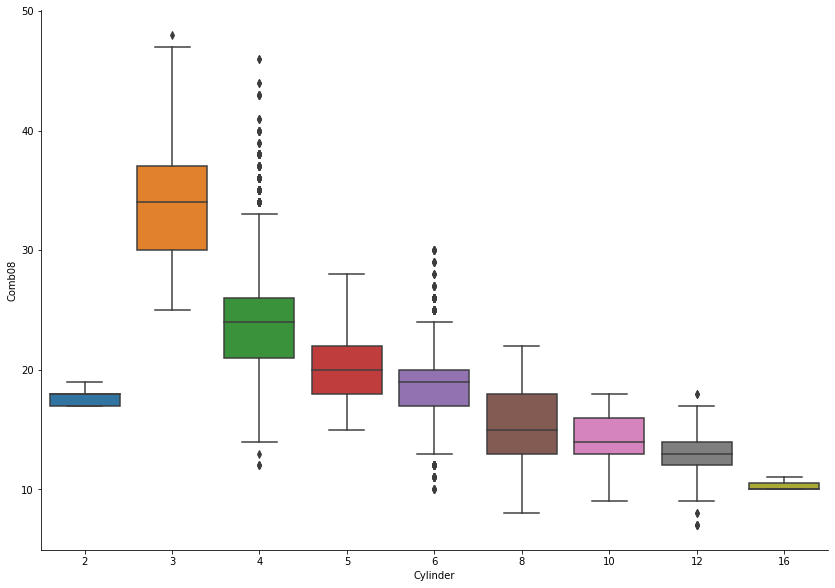

In [23]:
#Grafica un boxplot de las variables de interés
sns.catplot(x="Cylinder", y="Comb08", kind="box", data=VehiclesMPGClean, height = 8.27, aspect = 11.7/8.27)

### <font color='mediumblue'>Tipo de motor</font>

De la figura a continuación se observa que los motores "twincharged" y turbocargados tienden a contar con mayores eficiencias energéticas tal como lo indica la teoría. 

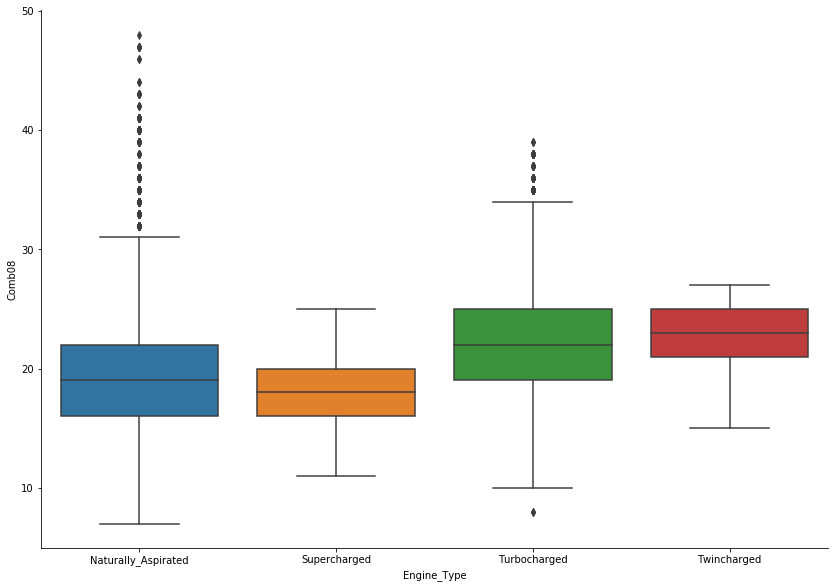

In [24]:
#Grafica un boxplot de las variables de interés
sns.catplot(x="Engine_Type", y="Comb08", kind="box", data=VehiclesMPGClean, height = 8.27, aspect = 11.7/8.27)

### <font color='mediumblue'>Tren de transmisión</font>

Se observa a partir del boxplot a continuación que las mayores eficiencias energéticas se obtienen en vehículos con tracción delantera mientras que de manera contrarias las más bajas se observan en vehículos tracción trasera. 

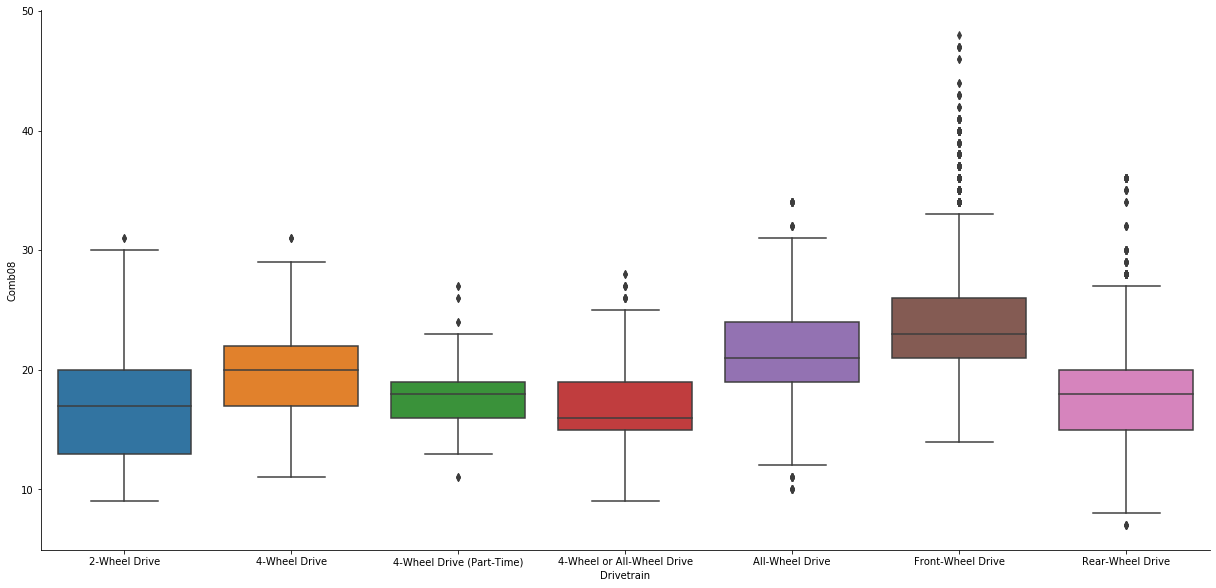

In [25]:
#Grafica un boxplot de las variables de interés
sns.catplot(x="Drivetrain", y="Comb08", kind="box", data=VehiclesMPGClean, height = 8.27, aspect = 17/8.27)

### <font color='mediumblue'>Tipo de transmisión y cantidades de engranes</font>

TBD

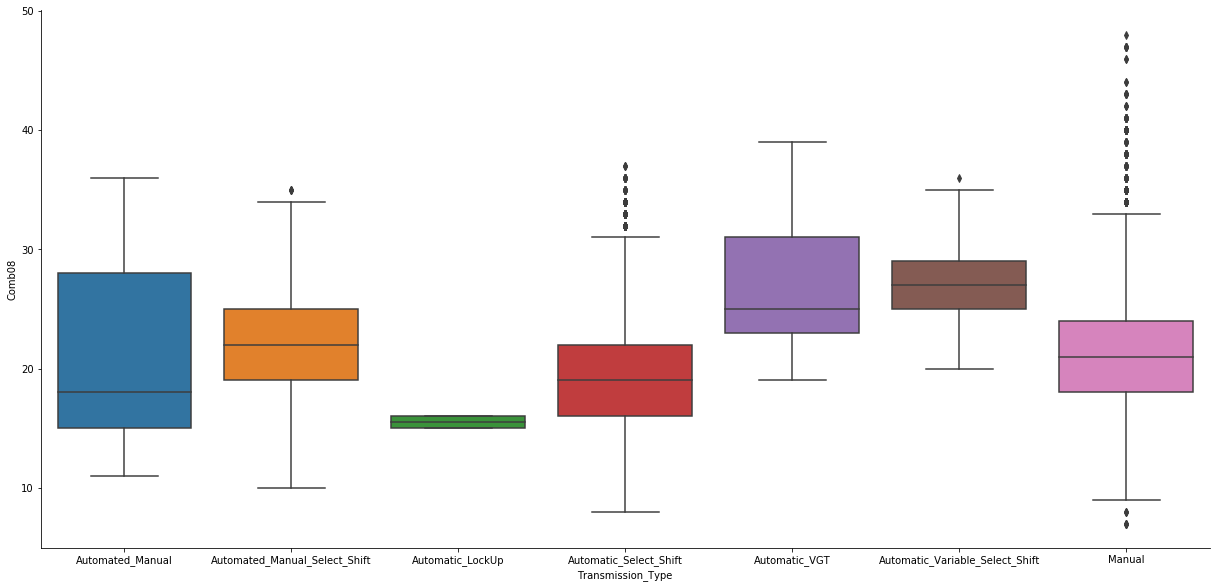

In [30]:
#Grafica un boxplot de las variables de interés
sns.catplot(x="Transmission_Type", y="Comb08", kind="box", data=VehiclesMPGClean, height = 8.27, aspect = 17/8.27)

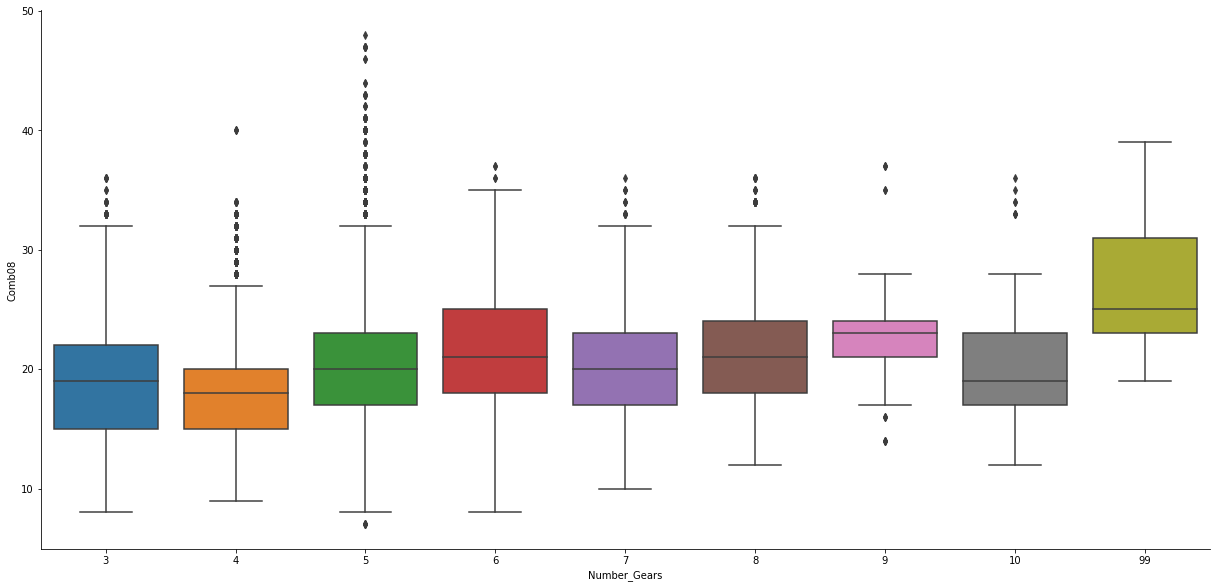

In [27]:
#Grafica un boxplot de las variables de interés
sns.catplot(x="Number_Gears", y="Comb08", kind="box", data=VehiclesMPGClean, height = 8.27, aspect = 17/8.27)

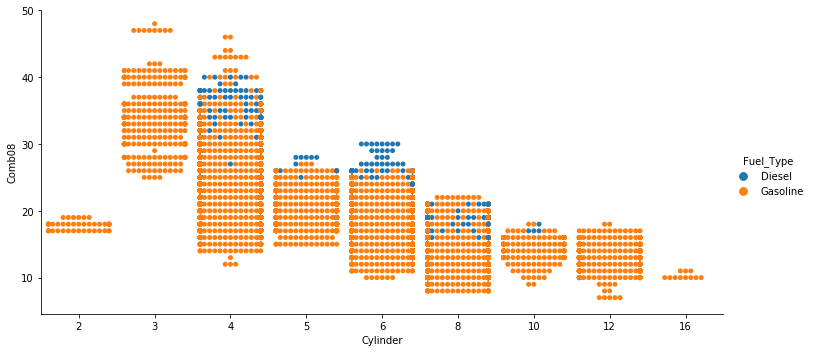

In [39]:
scatterFig01 = sns.catplot(x="Cylinder",y="Comb08",hue="Fuel_Type",kind="swarm",data=VehiclesMPGClean,aspect = 17/8.27)

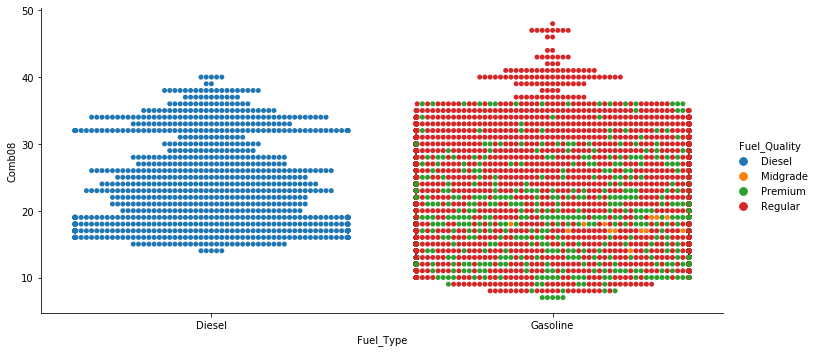

In [40]:
scatterFig02 = sns.catplot(x="Fuel_Type",y="Comb08",hue="Fuel_Quality",kind="swarm",data=VehiclesMPGClean,aspect = 17/8.27)

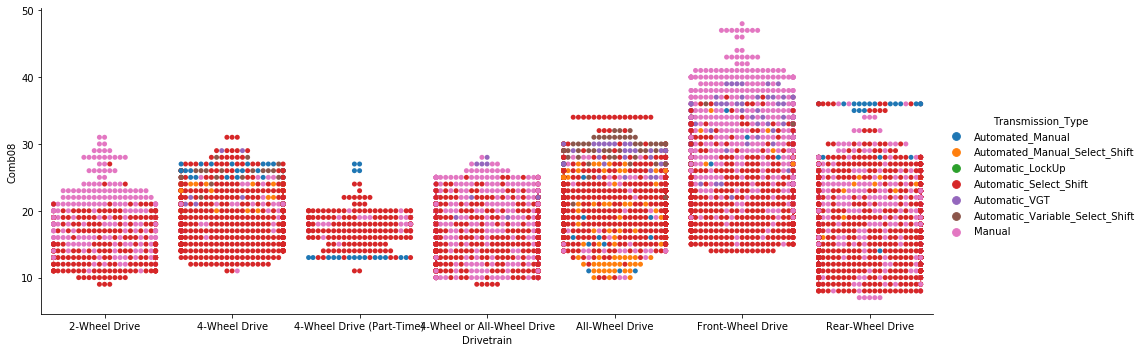

In [84]:
scatterFig03 = sns.catplot(x="Drivetrain",y="Comb08",hue="Transmission_Type",kind="swarm",data=VehiclesMPGClean,aspect = 22/8.27)

## <font color='mediumblue'>Creación de variables "dummy"</font>

Dado que la mayoría de los atributos que componen el conjunto de datos son del tipo categórico, se procedió a crear variables **dummy** para poder llevar a cabo análisis de correlación entre atributos y además ejecutar los algoritmos que determinan los potenciales modelos predictores.

In [18]:
#Crea variables dummy por cada uno de los atributos categóricos
VehiclesMPGDummy = pd.get_dummies(VehiclesMPGClean)
VehiclesMPGDummy.head()

,Engine_Displacement,Comb08,Fuel_Type_Diesel,Fuel_Type_Gasoline,Fuel_Quality_Diesel,Fuel_Quality_Midgrade,Fuel_Quality_Premium,Fuel_Quality_Regular,Make_AM General,Make_ASC Incorporated,Make_Acura,Make_Alfa Romeo,Make_American Motors Corporation,Make_Aston Martin,Make_Audi,Make_Aurora Cars Ltd,Make_Autokraft Limited,Make_BMW,Make_Bentley,Make_Bertone,Make_Bill Dovell Motor Car Company,Make_Bitter Gmbh and Co. Kg,Make_Bugatti,Make_Buick,Make_CCC Engineering,Make_CX Automotive,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Consulier Industries Inc,Make_Dabryan Coach Builders Inc,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,"Make_E. P. Dutton, Inc.",Make_Eagle,Make_Environmental Rsch and Devp Corp,Make_Evans Automobiles,Make_Excalibur Autos,Make_Federal Coach,Make_Ferrari,Make_Fiat,Make_Ford,Make_GMC,Make_General Motors,Make_Genesis,Make_Geo,Make_Goldacre,Make_Grumman Allied Industries,Make_Grumman Olson,Make_Honda,Make_Hummer,Make_Hyundai,Make_Import Foreign Auto Sales Inc,Make_Import Trade Services,Make_Infiniti,Make_Isis Imports Ltd,Make_Isuzu,Make_J.K. Motors,"Make_JBA Motorcars, Inc.",Make_Jaguar,Make_Jeep,Make_Kia,Make_Koenigsegg,Make_Laforza Automobile Inc,Make_Lambda Control Systems,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_London Coach Co Inc,Make_London Taxi,Make_Lotus,Make_MINI,Make_Mahindra,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren Automotive,Make_Mcevoy Motors,Make_Mercedes-Benz,Make_Mercury,Make_Merkur,Make_Mitsubishi,Make_Mobility Ventures LLC,Make_Morgan,Make_Nissan,Make_Oldsmobile,Make_PAS Inc - GMC,"Make_PAS, Inc",Make_Pagani,Make_Panos,Make_Panoz Auto-Development,Make_Panther Car Company Limited,Make_Peugeot,Make_Pininfarina,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Quantum Technologies,Make_Qvale,Make_RUF Automobile,Make_Ram,Make_Red Shift Ltd.,Make_Renault,Make_Rolls-Royce,Make_Roush Performance,Make_Ruf Automobile Gmbh,Make_S and S Coach Company E.p. Dutton,Make_SRT,Make_STI,Make_Saab,Make_Saleen,Make_Saleen Performance,Make_Saturn,Make_Scion,Make_Shelby,Make_Spyker,Make_Sterling,Make_Subaru,Make_Superior Coaches Div E.p. Dutton,Make_Suzuki,Make_TVR Engineering Ltd,"Make_Tecstar, LP",Make_Texas Coach Company,Make_Toyota,Make_VPG,Make_Vector,Make_Vixen Motor Company,Make_Volga Associated Automobile,Make_Volkswagen,Make_Volvo,Make_Wallace Environmental,Make_Yugo,Make_smart,Year_1984,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Vehicle_Class_Compact Cars,Vehicle_Class_Large Cars,Vehicle_Class_Midsize Cars,Vehicle_Class_Midsize Station Wagons,Vehicle_Class_Midsize-Large Station Wagons,Vehicle_Class_Minicompact Cars,Vehicle_Class_Minivan - 2WD,Vehicle_Class_Minivan - 4WD,Vehicle_Class_Small Pickup Trucks,Vehicle_Class_Small Pickup Trucks 2WD,Vehicle_Class_Small Pickup Trucks 4WD,Vehicle_Class_Small Sport Utility Vehicle 2WD,Vehicle_Class_Small Sport Utility Vehicle 4WD,Vehicle_Class_Small Station Wagons,Vehicle_Class_Special Purpose Vehicle,Vehicle_Class_Special Purpose Vehicle 2WD,Vehicle_Class_Special Purpose Vehicle 4WD,Vehicle_Class_Special Purpose Vehicles,Vehicle_Class_Special Purpose Vehicles/2wd,Vehicle_Class_Special Purpose Vehicles/4wd,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Pickup Trucks/2wd,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,Vehicle_Class_Vans,Vehicle_Class_Vans Passenger,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type",Transmi

In [20]:
VehiclesMPGDummy.shape

(38299, 246)

## <font color='mediumblue'>Análisis de correlación</font>

Un paso importante que puede simplificar el conjunto de datos es realizar una análisis de correlación. En este caso que ya se crearon variables dummy y que por tanto es posible analizar correlación entre variables categóricas se procedió con el análisis en cuestión. 
<br>Es importante mencionar que dado que la dimensionalidad del conjunto de datos se expandió considerablemente al crear variables dummy se utilizó código para poder navegar a través de la matriz de correlación buscando los atributos con correlaciones altas.
<br>Link de referencia: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [21]:
#Crea una matriz de correlación con valores absolutos
corrMat = VehiclesMPGDummy.corr().abs()
#Salva la matriz de correlación en un archivo de Excel para que pueda ser analizado preliminarmente
corrMat.to_csv(r'A:\Python Notebooks\MPGCorrelationMatrix.csv',index = False)

In [22]:
#Dado que la matriz de correlación es simétrica se analiza solamente la parte superior.
upperMat = corrMat.where(np.triu(np.ones(corrMat.shape), k=1).astype(np.bool))

In [23]:
#Busca el índice de los atributos que tienen una correlación mayor a .90
toDrop = [column for column in upperMat.columns if any(upperMat[column] > 0.90)]
print(toDrop)

['Fuel_Type_Gasoline', 'Fuel_Quality_Diesel', 'Fuel_Quality_Regular', 'Vehicle_Class_Special Purpose Vehicle', 'Number_Gears_99', 'Engine_Type_Turbocharged', 'Cylinder_16', 'Start_Stop_Y']


In [24]:
#Elimina los atributos en cuestión que no se consideraron importantes para el análisis basado en correlación. 
MPGDummyCorrClean = VehiclesMPGDummy.drop(columns = [#'CO2Tail_Pipe_GPM',
                                                     'Number_Gears_99',
                                                     'Cylinder_16',
                                                     'Vehicle_Class_Special Purpose Vehicle'])

## <font color='mediumblue'>Separación de variable dependiente</font>

En el proceso de creación de modelos predictores en Python, es necesario separar las variables independientes de la variable predecir para lo cual se utilizó el código a continuación. Es importante mencionar que antes de separar los conjuntos de datos se reordenó de manera aleatoria las filas del conjunto de datos para evitar sesgo por secuencia de captura de los datos.

In [25]:
#Reordena de manera aleatoria el conjunto de datos
MPGDummyCorrClean = MPGDummyCorrClean.sample(frac=1).reset_index(drop=True)

In [26]:
#Separa la variable dependiente del conjunto de datos
MPGDependent = MPGDummyCorrClean['Comb08']
MPGDependent.tail()

38294    21
38295    22
38296    21
38297    28
38298    19
Name: Comb08, dtype: int16

In [27]:
#Separa la variable independiente del conjunto de datos
MPGIndependent = MPGDummyCorrClean.drop(columns=['Comb08'])
MPGIndependent.tail()

,Engine_Displacement,Fuel_Type_Diesel,Fuel_Type_Gasoline,Fuel_Quality_Diesel,Fuel_Quality_Midgrade,Fuel_Quality_Premium,Fuel_Quality_Regular,Make_AM General,Make_ASC Incorporated,Make_Acura,Make_Alfa Romeo,Make_American Motors Corporation,Make_Aston Martin,Make_Audi,Make_Aurora Cars Ltd,Make_Autokraft Limited,Make_BMW,Make_Bentley,Make_Bertone,Make_Bill Dovell Motor Car Company,Make_Bitter Gmbh and Co. Kg,Make_Bugatti,Make_Buick,Make_CCC Engineering,Make_CX Automotive,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Consulier Industries Inc,Make_Dabryan Coach Builders Inc,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,"Make_E. P. Dutton, Inc.",Make_Eagle,Make_Environmental Rsch and Devp Corp,Make_Evans Automobiles,Make_Excalibur Autos,Make_Federal Coach,Make_Ferrari,Make_Fiat,Make_Ford,Make_GMC,Make_General Motors,Make_Genesis,Make_Geo,Make_Goldacre,Make_Grumman Allied Industries,Make_Grumman Olson,Make_Honda,Make_Hummer,Make_Hyundai,Make_Import Foreign Auto Sales Inc,Make_Import Trade Services,Make_Infiniti,Make_Isis Imports Ltd,Make_Isuzu,Make_J.K. Motors,"Make_JBA Motorcars, Inc.",Make_Jaguar,Make_Jeep,Make_Kia,Make_Koenigsegg,Make_Laforza Automobile Inc,Make_Lambda Control Systems,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_London Coach Co Inc,Make_London Taxi,Make_Lotus,Make_MINI,Make_Mahindra,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren Automotive,Make_Mcevoy Motors,Make_Mercedes-Benz,Make_Mercury,Make_Merkur,Make_Mitsubishi,Make_Mobility Ventures LLC,Make_Morgan,Make_Nissan,Make_Oldsmobile,Make_PAS Inc - GMC,"Make_PAS, Inc",Make_Pagani,Make_Panos,Make_Panoz Auto-Development,Make_Panther Car Company Limited,Make_Peugeot,Make_Pininfarina,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Quantum Technologies,Make_Qvale,Make_RUF Automobile,Make_Ram,Make_Red Shift Ltd.,Make_Renault,Make_Rolls-Royce,Make_Roush Performance,Make_Ruf Automobile Gmbh,Make_S and S Coach Company E.p. Dutton,Make_SRT,Make_STI,Make_Saab,Make_Saleen,Make_Saleen Performance,Make_Saturn,Make_Scion,Make_Shelby,Make_Spyker,Make_Sterling,Make_Subaru,Make_Superior Coaches Div E.p. Dutton,Make_Suzuki,Make_TVR Engineering Ltd,"Make_Tecstar, LP",Make_Texas Coach Company,Make_Toyota,Make_VPG,Make_Vector,Make_Vixen Motor Company,Make_Volga Associated Automobile,Make_Volkswagen,Make_Volvo,Make_Wallace Environmental,Make_Yugo,Make_smart,Year_1984,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Vehicle_Class_Compact Cars,Vehicle_Class_Large Cars,Vehicle_Class_Midsize Cars,Vehicle_Class_Midsize Station Wagons,Vehicle_Class_Midsize-Large Station Wagons,Vehicle_Class_Minicompact Cars,Vehicle_Class_Minivan - 2WD,Vehicle_Class_Minivan - 4WD,Vehicle_Class_Small Pickup Trucks,Vehicle_Class_Small Pickup Trucks 2WD,Vehicle_Class_Small Pickup Trucks 4WD,Vehicle_Class_Small Sport Utility Vehicle 2WD,Vehicle_Class_Small Sport Utility Vehicle 4WD,Vehicle_Class_Small Station Wagons,Vehicle_Class_Special Purpose Vehicle 2WD,Vehicle_Class_Special Purpose Vehicle 4WD,Vehicle_Class_Special Purpose Vehicles,Vehicle_Class_Special Purpose Vehicles/2wd,Vehicle_Class_Special Purpose Vehicles/4wd,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Pickup Trucks/2wd,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,Vehicle_Class_Vans,Vehicle_Class_Vans Passenger,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type",Transmission_Type_Automated_Manual,Transmission_Type

## <font color='mediumblue'>Normalización de variables independientes</font>

Con el objetivo de traducir el conjunto de datos a uno computacionalmente interpretable por la máquina se deben normalizar los datos. La normalización debe llevase a cabo en ambos conjuntos de datos tanto de entrenamiento como de prueba. 

In [28]:
#Escala el conjunto de adtos
MPGIndependentNormal = preprocessing.scale(MPGIndependent)
print(MPGIndependentNormal)

[[-0.95216174 -0.16640931  0.16640931 ... -0.12806576  0.28579497
  -0.28579497]
 [ 0.23945561 -0.16640931  0.16640931 ... -0.12806576  0.28579497
  -0.28579497]
 [ 0.53735995 -0.16640931  0.16640931 ... -0.12806576  0.28579497
  -0.28579497]
 ...
 [-0.20740089 -0.16640931  0.16640931 ... -0.12806576  0.28579497
  -0.28579497]
 [-1.32454216 -0.16640931  0.16640931 ... -0.12806576 -3.49901191
   3.49901191]
 [-0.80320957 -0.16640931  0.16640931 ... -0.12806576  0.28579497
  -0.28579497]]


In [29]:
#Convierte el Numpy array creado anteriormente en un dataframe de Pandas
MPGIndependentNormalDF = pd.DataFrame(MPGIndependentNormal)
#Crea una lista de los nombres de los atributos del dataframe en cuestión
colNames = list(MPGIndependent.columns.values)
#Renombra las columnas del nuevo dataframa a las correspondientes
MPGIndependentNormalDF.columns =[colNames]
MPGIndependentNormalDF.head()

,Engine_Displacement,Fuel_Type_Diesel,Fuel_Type_Gasoline,Fuel_Quality_Diesel,Fuel_Quality_Midgrade,Fuel_Quality_Premium,Fuel_Quality_Regular,Make_AM General,Make_ASC Incorporated,Make_Acura,Make_Alfa Romeo,Make_American Motors Corporation,Make_Aston Martin,Make_Audi,Make_Aurora Cars Ltd,Make_Autokraft Limited,Make_BMW,Make_Bentley,Make_Bertone,Make_Bill Dovell Motor Car Company,Make_Bitter Gmbh and Co. Kg,Make_Bugatti,Make_Buick,Make_CCC Engineering,Make_CX Automotive,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Consulier Industries Inc,Make_Dabryan Coach Builders Inc,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,"Make_E. P. Dutton, Inc.",Make_Eagle,Make_Environmental Rsch and Devp Corp,Make_Evans Automobiles,Make_Excalibur Autos,Make_Federal Coach,Make_Ferrari,Make_Fiat,Make_Ford,Make_GMC,Make_General Motors,Make_Genesis,Make_Geo,Make_Goldacre,Make_Grumman Allied Industries,Make_Grumman Olson,Make_Honda,Make_Hummer,Make_Hyundai,Make_Import Foreign Auto Sales Inc,Make_Import Trade Services,Make_Infiniti,Make_Isis Imports Ltd,Make_Isuzu,Make_J.K. Motors,"Make_JBA Motorcars, Inc.",Make_Jaguar,Make_Jeep,Make_Kia,Make_Koenigsegg,Make_Laforza Automobile Inc,Make_Lambda Control Systems,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_London Coach Co Inc,Make_London Taxi,Make_Lotus,Make_MINI,Make_Mahindra,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren Automotive,Make_Mcevoy Motors,Make_Mercedes-Benz,Make_Mercury,Make_Merkur,Make_Mitsubishi,Make_Mobility Ventures LLC,Make_Morgan,Make_Nissan,Make_Oldsmobile,Make_PAS Inc - GMC,"Make_PAS, Inc",Make_Pagani,Make_Panos,Make_Panoz Auto-Development,Make_Panther Car Company Limited,Make_Peugeot,Make_Pininfarina,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Quantum Technologies,Make_Qvale,Make_RUF Automobile,Make_Ram,Make_Red Shift Ltd.,Make_Renault,Make_Rolls-Royce,Make_Roush Performance,Make_Ruf Automobile Gmbh,Make_S and S Coach Company E.p. Dutton,Make_SRT,Make_STI,Make_Saab,Make_Saleen,Make_Saleen Performance,Make_Saturn,Make_Scion,Make_Shelby,Make_Spyker,Make_Sterling,Make_Subaru,Make_Superior Coaches Div E.p. Dutton,Make_Suzuki,Make_TVR Engineering Ltd,"Make_Tecstar, LP",Make_Texas Coach Company,Make_Toyota,Make_VPG,Make_Vector,Make_Vixen Motor Company,Make_Volga Associated Automobile,Make_Volkswagen,Make_Volvo,Make_Wallace Environmental,Make_Yugo,Make_smart,Year_1984,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Vehicle_Class_Compact Cars,Vehicle_Class_Large Cars,Vehicle_Class_Midsize Cars,Vehicle_Class_Midsize Station Wagons,Vehicle_Class_Midsize-Large Station Wagons,Vehicle_Class_Minicompact Cars,Vehicle_Class_Minivan - 2WD,Vehicle_Class_Minivan - 4WD,Vehicle_Class_Small Pickup Trucks,Vehicle_Class_Small Pickup Trucks 2WD,Vehicle_Class_Small Pickup Trucks 4WD,Vehicle_Class_Small Sport Utility Vehicle 2WD,Vehicle_Class_Small Sport Utility Vehicle 4WD,Vehicle_Class_Small Station Wagons,Vehicle_Class_Special Purpose Vehicle 2WD,Vehicle_Class_Special Purpose Vehicle 4WD,Vehicle_Class_Special Purpose Vehicles,Vehicle_Class_Special Purpose Vehicles/2wd,Vehicle_Class_Special Purpose Vehicles/4wd,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Pickup Trucks/2wd,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,Vehicle_Class_Vans,Vehicle_Class_Vans Passenger,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type",Transmission_Type_Automated_Manual,Transmission_Type

## <font color='mediumblue'>Eliminación recursiva de atributos</font>

En vista que el análisis de la matriz de correlación no permitió reducir significativamente la dimensionalidad del conjunto de datos se procedió a aplicar eliminación recursiva de atributos.
<br>Se recomienda utilizar el conjunto de datos completo dado que el propósito de este modelo predictor preliminar es simplificar el modelo y no realizar predicciones en producción que deban ser validadas contra un conjunto de datos de prueba.

In [30]:
#Asigna el modelo predictor a utilizar con un aleatorio de 101 con el fin de reproducibilidad
RFR = RandomForestRegressor(random_state = 101)

In [31]:
#Establece los parámetros deseados para el modelo predictor específico
rfecv = RFECV(estimator = RFR, step = 1, cv=StratifiedKFold(10))

In [32]:
#Realiza la predicción
rfecv.fit(MPGIndependentNormalDF,MPGDependent)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators='warn', n_jobs=None,
                                      oob_score=False, random_state=101,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [33]:
#Declara la cantidad óptima de atributos requeridos para realizar la predicción con mayor precisión
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 198


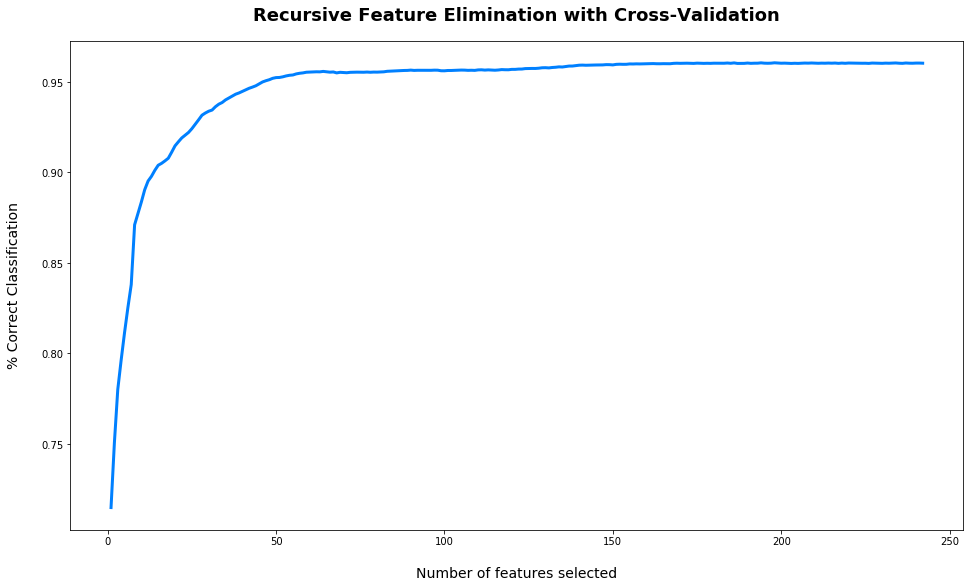

In [34]:
#Realiza un plot de relevancia del número de atributos y la precisión del modelo predictor
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#0080ff', linewidth=3)
plt.show()

In [35]:
#Despliega los atributos menos importantes para el modelo predictor. 
print(np.where(rfecv.support_ == False)[0])

[  8  14  23  29  34  38  47  48  53  56  59  63  64  65  70  71  74  78
  79  84  85  88  89  90  91  93  95  99 101 103 105 108 109 110 116 120
 122 123 126 128 190 191 203 208]


In [36]:
#Despliega un array con los nombres de las columnas relevantes para el análisis
MPGIndependentNormalDF.columns.values[rfecv.support_]

array([('Engine_Displacement',), ('Fuel_Type_Diesel',),
       ('Fuel_Type_Gasoline',), ('Fuel_Quality_Diesel',),
       ('Fuel_Quality_Midgrade',), ('Fuel_Quality_Premium',),
       ('Fuel_Quality_Regular',), ('Make_AM General',), ('Make_Acura',),
       ('Make_Alfa Romeo',), ('Make_American Motors Corporation',),
       ('Make_Aston Martin',), ('Make_Audi',),
       ('Make_Autokraft Limited',), ('Make_BMW',), ('Make_Bentley',),
       ('Make_Bertone',), ('Make_Bill Dovell Motor Car Company',),
       ('Make_Bitter Gmbh and Co. Kg',), ('Make_Bugatti',),
       ('Make_Buick',), ('Make_CX Automotive',), ('Make_Cadillac',),
       ('Make_Chevrolet',), ('Make_Chrysler',),
       ('Make_Consulier Industries Inc',), ('Make_Dacia',),
       ('Make_Daewoo',), ('Make_Daihatsu',), ('Make_Dodge',),
       ('Make_Eagle',), ('Make_Environmental Rsch and Devp Corp',),
       ('Make_Evans Automobiles',), ('Make_Federal Coach',),
       ('Make_Ferrari',), ('Make_Fiat',), ('Make_Ford',), ('Make_GMC',)

In [37]:
#Elimina los atributos no relevantes según la eliminación de atributos recursiva realizada
MPGIndependentNormalDF.drop(MPGIndependentNormalDF.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
MPGIndependentNormalDF.head()

,Engine_Displacement,Fuel_Type_Diesel,Fuel_Type_Gasoline,Fuel_Quality_Diesel,Fuel_Quality_Midgrade,Fuel_Quality_Premium,Fuel_Quality_Regular,Make_AM General,Make_Acura,Make_Alfa Romeo,Make_American Motors Corporation,Make_Aston Martin,Make_Audi,Make_Autokraft Limited,Make_BMW,Make_Bentley,Make_Bertone,Make_Bill Dovell Motor Car Company,Make_Bitter Gmbh and Co. Kg,Make_Bugatti,Make_Buick,Make_CX Automotive,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Consulier Industries Inc,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,Make_Eagle,Make_Environmental Rsch and Devp Corp,Make_Evans Automobiles,Make_Federal Coach,Make_Ferrari,Make_Fiat,Make_Ford,Make_GMC,Make_General Motors,Make_Genesis,Make_Geo,Make_Grumman Olson,Make_Honda,Make_Hummer,Make_Hyundai,Make_Import Trade Services,Make_Infiniti,Make_Isuzu,Make_J.K. Motors,Make_Jaguar,Make_Jeep,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_MINI,Make_Maserati,Make_Maybach,Make_Mazda,Make_Mercedes-Benz,Make_Mercury,Make_Merkur,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Panoz Auto-Development,Make_Peugeot,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Qvale,Make_Ram,Make_Renault,Make_Roush Performance,Make_Ruf Automobile Gmbh,Make_Saab,Make_Saleen,Make_Saleen Performance,Make_Saturn,Make_Scion,Make_Spyker,Make_Sterling,Make_Subaru,Make_Suzuki,Make_Texas Coach Company,Make_Toyota,Make_Vector,Make_Volga Associated Automobile,Make_Volkswagen,Make_Volvo,Make_Wallace Environmental,Make_Yugo,Make_smart,Year_1984,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Vehicle_Class_Compact Cars,Vehicle_Class_Large Cars,Vehicle_Class_Midsize Cars,Vehicle_Class_Midsize Station Wagons,Vehicle_Class_Midsize-Large Station Wagons,Vehicle_Class_Minicompact Cars,Vehicle_Class_Minivan - 2WD,Vehicle_Class_Minivan - 4WD,Vehicle_Class_Small Pickup Trucks,Vehicle_Class_Small Pickup Trucks 2WD,Vehicle_Class_Small Pickup Trucks 4WD,Vehicle_Class_Small Sport Utility Vehicle 2WD,Vehicle_Class_Small Sport Utility Vehicle 4WD,Vehicle_Class_Small Station Wagons,Vehicle_Class_Special Purpose Vehicle 2WD,Vehicle_Class_Special Purpose Vehicle 4WD,Vehicle_Class_Special Purpose Vehicles,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Pickup Trucks/2wd,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,Vehicle_Class_Vans,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type",Transmission_Type_Automated_Manual,Transmission_Type_Automated_Manual_Select_Shift,Transmission_Type_Automatic_Select_Shift,Transmission_Type_Automatic_VGT,Transmission_Type_Automatic_Variable_Select_Shift,Transmission_Type_Manual,Number_Gears_3,Number_Gears_4,Number_Gears_5,Number_Gears_6,Number_Gears_7,Number_Gears_8,Number_Gears_9,Number_Gears_10,Drivetrain_2-Wheel Drive,Drivetrain_4-Wheel Drive,Drivetrain_4-Wheel Drive (Part-Time),Drivetrain_4-Wheel or All-Wheel Drive,Drivetrain_All-Wheel Drive,Drivetrain_Front-Wheel Drive,Drivetrain_Rear-Wheel Drive,Engine_Type_Naturally_Aspirated,Engine_Type_Supercharged,Engine_Type_Turbocharged,Engine_Type_Twincharged,Cylinder_2,Cylinder_3,Cylinder_4,Cylinder_5,Cylinder_6,Cylinder_8,Cylinder_10,Cylinder_12,Start_Stop_N,Start_Stop_Y
0,-0.952162,-0.166409,0.166409,-0.167154,-0.054639,1.499018,-1.399090,-0.012517,-0.094501,-0.041232,-0.026561,-0.062915,-0.160601,-0.01022,-0.231805,-0.054157,-0.011427,-0.007227,-0.008851,-0.01695,-0.121594,-0.021073,-0.120483,-0.320271,-0.1

In [38]:
#Muestra un array con la importancia de los atributos que se preservan en el conjunto de datos
rfecv.estimator_.feature_importances_

array([7.10526711e-01, 9.61425354e-03, 4.64313025e-03, 1.88139384e-02,
       3.64615680e-05, 3.00737091e-03, 3.11740719e-03, 3.22316219e-05,
       2.56598485e-04, 9.54452388e-05, 4.51544721e-05, 6.03988952e-04,
       5.65466762e-04, 3.61617422e-06, 1.76623210e-03, 1.91232137e-04,
       3.18027741e-05, 1.36331850e-05, 9.24747770e-06, 2.53168841e-05,
       5.14828697e-04, 2.99639316e-04, 5.43969491e-04, 1.83769845e-03,
       2.90456111e-04, 3.02244097e-06, 1.79568906e-04, 3.04589184e-04,
       2.59629847e-04, 2.11900207e-03, 8.72986317e-05, 4.24713780e-06,
       1.49723272e-05, 1.68964382e-05, 3.28534043e-03, 1.44828190e-04,
       1.72238255e-03, 3.11804534e-04, 1.93503249e-05, 9.24154159e-05,
       3.37538066e-04, 9.86859367e-06, 2.57665164e-03, 2.39712674e-05,
       1.06903806e-03, 1.23162626e-04, 1.68943661e-04, 3.59594522e-04,
       2.37546065e-04, 3.22622845e-04, 5.69718657e-04, 8.42598342e-04,
       1.62646912e-04, 4.36748500e-04, 3.63949334e-04, 1.97102521e-04,
      

## <font color='mediumblue'>Separación conjunto de datos de entrenamiento y prueba</font>

El siguiente bloque de código segrega el conjunto de datos en los siguientes subconjuntos de entrenamiento y prueba, variables dependientes e independientes para que estos pueda ser ingresados en los algoritmos de predicción.

In [42]:
#Segrega los conjuntos de datos
x_train,x_test,y_train,y_test = train_test_split(MPGIndependentNormalDF,MPGDependent,test_size=0.3)

In [43]:
#Despliega el tamaño del subconjunto de interés
x_test.shape

(11490, 198)

## <font color='mediumblue'>Entrenamiento de modelos predictores</font>

### <font color='mediumblue'>Random Forest - Out of the Box</font>

In [44]:
modelRFR01 = RandomForestRegressor()
modelRFR01.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
print(cross_val_score(modelRFR01, x_train, y_train))

[0.94802321 0.94361361 0.95020607]


In [46]:
predictionsRFR01 = modelRFR01.predict(x_test)
predRsquaredRFR01 = r2_score(y_test,predictionsRFR01)
rmseRFR01 = sqrt(mean_squared_error(y_test, predictionsRFR01))

In [47]:
print('R Squared: %.3f' % predRsquaredRFR01)
print('RMSE: %.3f' % rmseRFR01)

R Squared: 0.955
RMSE: 1.043


### <font color='mediumblue'>Random Forest - Tuning (Ganador)</font>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [80]:
modelRFR02 = RandomForestRegressor(n_estimators = 50)

In [81]:
modelRFR02.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
print(cross_val_score(modelRFR02, x_train, y_train))

[0.95093468 0.94949256 0.95418472]


In [83]:
predictionsRFR02 = modelRFR02.predict(x_test)
predRsquaredRFR02 = r2_score(y_test,predictionsRFR02)
rmseRFR02 = sqrt(mean_squared_error(y_test, predictionsRFR02))

In [85]:
print('R Squared: %.3f' % predRsquaredRFR02)
print('RMSE: %.3f' % rmseRFR02)

R Squared: 0.958
RMSE: 1.015


### <font color='mediumblue'>Support Vector Machine - Out of the Box</font>

In [49]:
modelSVM01 = svm.SVR()

In [50]:
modelSVM01.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
print(cross_val_score(modelSVM01, x_train, y_train))

[0.89507789 0.89485502 0.8977036 ]


In [53]:
predictionsSVM01 = modelSVM01.predict(x_test)
predRsquaredSVM01 = r2_score(y_test,predictionsSVM01)
rmseSVM01 = sqrt(mean_squared_error(y_test, predictionsSVM01))

In [55]:
print('R Squared: %.3f' % predRsquaredSVM01)
print('RMSE: %.3f' % rmseSVM01)

R Squared: 0.908
RMSE: 1.495


### <font color='mediumblue'>Support Vector Machine - Tuning</font>

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

In [75]:
modelSVM02 = svm.SVR(kernel = 'poly', gamma = 'auto')

In [76]:
modelSVM02.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
print(cross_val_score(modelSVM02, x_train, y_train))

[0.78982102 0.78101423 0.79655809]


In [78]:
predictionsSVM02 = modelSVM02.predict(x_test)
predRsquaredSVM02 = r2_score(y_test,predictionsSVM02)
rmseSVM02 = sqrt(mean_squared_error(y_test, predictionsSVM02))

In [79]:
print('R Squared: %.3f' % predRsquaredSVM02)
print('RMSE: %.3f' % rmseSVM02)

R Squared: 0.832
RMSE: 2.027


### <font color='mediumblue'>Decision Tree - Out of the Box</font>

In [62]:
modelDT01 = tree.DecisionTreeRegressor()

In [65]:
modelDT01.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
print(cross_val_score(modelDT01, x_train, y_train))

[0.928378   0.92988229 0.931734  ]


In [67]:
predictionsDT01 = modelDT01.predict(x_test)
predRsquaredDT01 = r2_score(y_test,predictionsDT01)
rmseDT01 = sqrt(mean_squared_error(y_test, predictionsDT01))

In [68]:
print('R Squared: %.3f' % predRsquaredDT01)
print('RMSE: %.3f' % rmseDT01)

R Squared: 0.941
RMSE: 1.196


### <font color='mediumblue'>Decision Tree - Tuning</font>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [70]:
modelDT02 = tree.DecisionTreeRegressor(criterion = 'mae', splitter = 'random')

In [71]:
modelDT02.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')

In [72]:
print(cross_val_score(modelDT02, x_train, y_train))

[0.91497662 0.92587382 0.92405053]


In [73]:
predictionsDT02 = modelDT02.predict(x_test)
predRsquaredDT02 = r2_score(y_test,predictionsDT02)
rmseDT02 = sqrt(mean_squared_error(y_test, predictionsDT02))

In [74]:
print('R Squared: %.3f' % predRsquaredDT02)
print('RMSE: %.3f' % rmseDT02)

R Squared: 0.935
RMSE: 1.257
